In [2]:
import pysal as ps

In [7]:
ps.examples.available()

['10740',
 'arcgis',
 'baltim',
 'book',
 'burkitt',
 'calemp',
 'chicago',
 'columbus',
 'desmith',
 'geodanet',
 'juvenile',
 'Line',
 'mexico',
 'nat',
 'networks',
 'newHaven',
 'nyc_bikes',
 'Point',
 'Polygon',
 'Polygon_Holes',
 'sacramento2',
 'sids2',
 'snow_maps',
 'south',
 'stl',
 'street_net_pts',
 'taz',
 'us_income',
 'virginia',
 'wmat']

In [8]:
ps.examples.explain('chicago')

{'description': 'Chicago neighborhoods',
 'explanation': [' * Chicago77.dbf attribute file',
  ' * Chicago77.shp shapefile',
  ' * Chicago77.shx spatial index',
  'Polygons, n=77, k=11'],
 'name': 'chicago'}

In [9]:
ps.pdio

<module 'pysal.contrib.pdio' from '/Users/sam/App-Setup/CondaENV/lib/python3.5/site-packages/pysal/contrib/pdio/__init__.py'>

In [13]:
# dataDir = "/Users/sam/All-Program/App-DataSet/Study/GeoSpatial-Analysis/tl_2015_48_tract/tl_2015_48_tract.shp"
shp_path = ps.examples.get_path('NAT.shp')
data_table = ps.pdio.read_files(shp_path)

In [18]:
data_table.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lake of the Woods,Minnesota,27,077,27077,27,77,27077,0,0.000000,...,0.024534,0.285235,0.372336,0.342104,0.336455,11.279621,5.4,5.663881,9.515860,<pysal.cg.shapes.Polygon object at 0x1126c8ac8>
1,Ferry,Washington,53,019,53019,53,19,53019,0,0.000000,...,0.317712,0.256158,0.360665,0.361928,0.360640,10.053476,2.6,10.079576,11.397059,<pysal.cg.shapes.Polygon object at 0x1126c8b38>
2,Stevens,Washington,53,065,53065,53,65,53065,0,1.863863,...,0.210030,0.283999,0.394083,0.357566,0.369942,9.258437,5.6,6.812127,10.352015,<pysal.cg.shapes.Polygon object at 0x1126c8ba8>
3,Okanogan,Washington,53,047,53047,53,47,53047,0,2.612330,...,0.155922,0.258540,0.371218,0.381240,0.394519,9.039900,8.1,10.084926,12.840340,<pysal.cg.shapes.Polygon object at 0x1126c8c18>
4,Pend Oreille,Washington,53,051,53051,53,51,53051,0,0.000000,...,0.134605,0.243263,0.365614,0.358706,0.387848,8.243930,4.1,7.557643,10.313002,<pysal.cg.shapes.Polygon object at 0x1126c8c88>


#### Projecting Lat Long into a planner map

In [34]:
import numpy as np
import pandas as pd
import utm
import geopandas as gpd
from shapely.geometry import Point

import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
# Using the UTM package 
# for lat,lon in 
# Note: utm function takes input param1:latitude, param2:longitude
print (utm.from_latlon(11.1, -80.2))
print (utm.from_latlon(11.1345, -80.11))
print (utm.from_latlon(11.2, -81.0))

# Using Geopandas:
dataIN = pd.DataFrame({'longitude': [-80.2, -80.11, -81.0], 'latitude': [11.1, 11.1345, 11.2]})
dataIN
s = gpd.GeoSeries([Point(x,y) for x, y in zip(dataIN['longitude'], dataIN['latitude'])])
s
geo_df = gpd.GeoDataFrame(geometry=s)   # Is Similar to doing SpatialDataFrame in R
geo_df
geo_df.crs = {'init': 'epsg:4326'}      # Initialize what type of CRS 

geo_df = geo_df.to_crs({'init': 'epsg:3395'}) # Convert into a new CRS, similar to doing 
geo_df
# The Equivallent R code for the above function would be :
# out <- spTransform(dataIN_Spatial_DF, CRS=CRS("+init=epsg:3395 +proj=merc +ellps=WGS84"))

(587368.1295072659, 1227153.9499450792, 17, 'P')
(597186.3160143532, 1230997.0010059343, 17, 'P')
(500000.0, 1238093.672948581, 17, 'P')


,geometry
0,POINT (-8927823.161620541 1235228.11420853)
1,POINT (-8917804.407449147 1239116.84994171)
2,POINT (-9016878.754255159 1246501.097746004)


## Manipulating Data Frames and accessing Geopandas:
----------

#### Part-1: Using world Map (Polygoan Data):

(177, 6)
       continent  gdp_md_est  \
0           Asia     22270.0   
1         Africa    110300.0   
2         Europe     21810.0   
3           Asia    184300.0   
4  South America    573900.0   

                                            geometry iso_a3  \
0  POLYGON ((61.21081709172574 35.65007233330923,...    AFG   
1  (POLYGON ((16.32652835456705 -5.87747039146621...    AGO   
2  POLYGON ((20.59024743010491 41.85540416113361,...    ALB   
3  POLYGON ((51.57951867046327 24.24549713795111,...    ARE   
4  (POLYGON ((-65.50000000000003 -55.199999999999...    ARG   

                   name     pop_est  
0           Afghanistan  28400000.0  
1                Angola  12799293.0  
2               Albania   3639453.0  
3  United Arab Emirates   4798491.0  
4             Argentina  40913584.0  


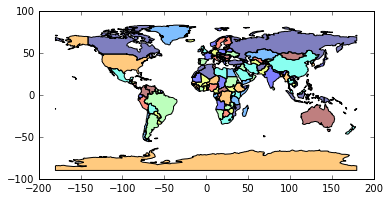

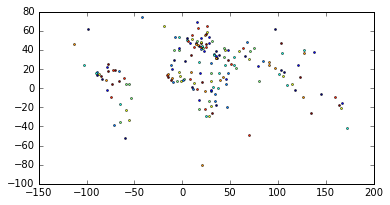

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print (world.shape)
print (world.head())

# To get the name of the coordinate column
world.geometry.name

# To rename the column to boder instead of geometry and then set it as the coordinate/geometry column
world = world.rename(columns={"geometry": "borders"}).set_geometry('borders')
world.plot()

# Now that our column "borders" is defined as the geometry column, we can do all
# geopandas operations on the Dataframe and only the border column will be affected by it.

# Lets us create a new column "centroid" that finds the center point of the polygoan area
world["centroid"] = world.centroid
# We have to set the centroid column as geometry to perform geopandas operations
world = world.set_geometry('centroid')
world.plot()

#### **A Choropleth map : **

A choropleth map is a thematic map (with a certain theme) in which are are shaded or patterend in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per capita income.

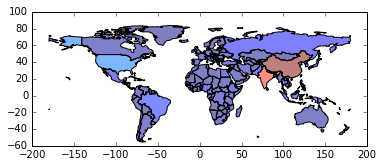

In [27]:
# Now we plot a map where the regions are colored based on the population residing at that part.
worldNew = world[(world.pop_est > 0) & (world.name != 'Antarctica')]
# Setting the geometry column again to borders for the new dataFrame to avoid centroid plots every time
worldNew = worldNew.rename(columns={"geometry": "borders"}).set_geometry('borders')
worldNew.plot(column='pop_est')

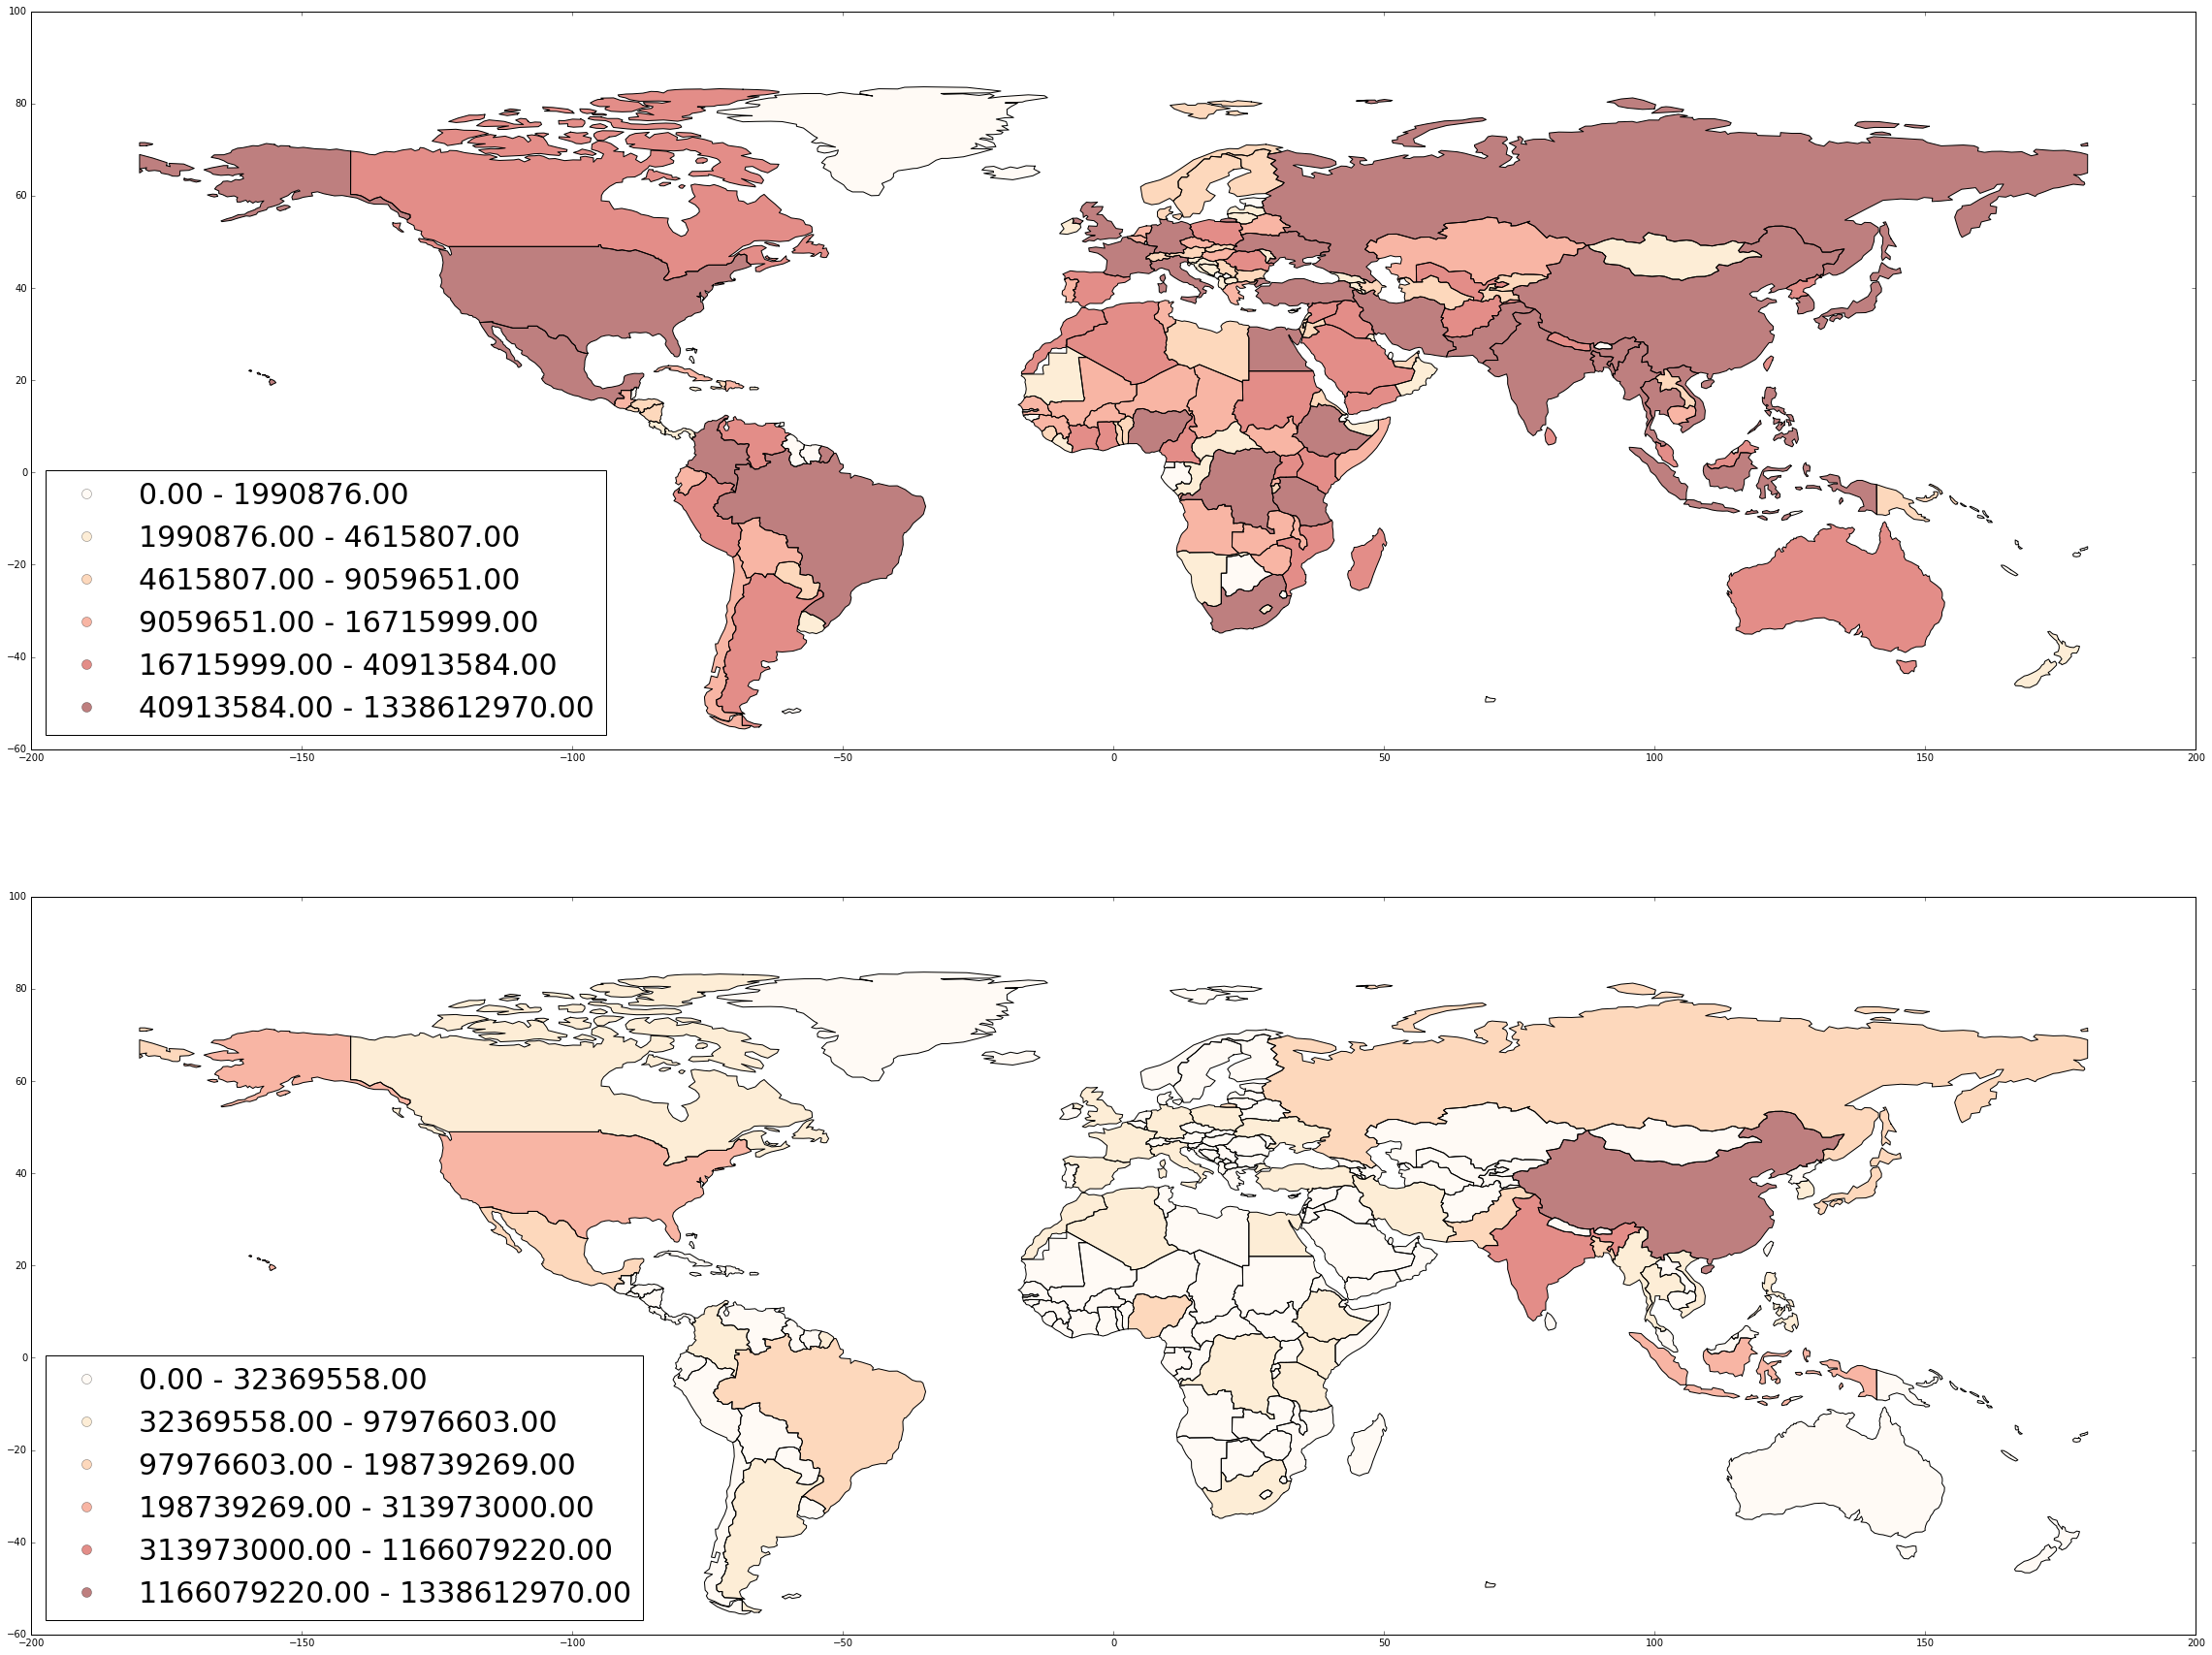

In [56]:
kw = dict(column='pop_est', k=6, cmap='OrRd')

fig, ax = plt.subplots(2,1, figsize=(40,30))
worldNew.plot(ax=ax[0], scheme='quantiles', **kw, legend=True); 
worldNew.plot(ax=ax[1], scheme='fisher_jenks', **kw, legend=True);
# A classification scheme is the product of arranging things
# into kinds of things (classes) or into groups of classes

leg0 = ax[0].get_legend()
leg0.set_bbox_to_anchor((0, 0, 1, 1))  # (left, bottom, width, height)

leg1 = ax[1].get_legend()
leg1.set_bbox_to_anchor((0, 0, 1, 1))


#### Part-2: Using Point Data (Lat, Long):

In [58]:
#
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
cities.head()

,geometry,name
0,POINT (12.45338654497177 41.90328217996012),Vatican City
1,POINT (12.44177015780014 43.936095834768),San Marino
2,POINT (9.516669472907267 47.13372377429357),Vaduz
3,POINT (6.130002806227083 49.61166037912108),Luxembourg
4,POINT (158.1499743237623 6.916643696007725),Palikir
